In [45]:
## library imports here
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
import plotnine as p9
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
bart = pd.read_csv("https://www.dropbox.com/scl/fi/fhudhxpxqtkg534m55c55/bart_post.csv?rlkey=pcjdnm3k1xeot84ogrmcjkwwr&st=adcotvzr&dl=1")
bart

,Ridership,Date,TotaEmployed,CPIRentSF,CPIFoodHomeSF,Bart Ticket Price,Gas Price,Unemployment,Crime
0,4089796,2020/03,3647.00,469.88,261.01,4.00,3.20,0.04,56
1,631371,2020/04,3122.70,466.20,269.50,4.00,2.82,0.13,15
2,736590,2020/05,3174.50,464.78,272.48,4.00,2.78,0.13,52
3,1049729,2020/06,3228.40,463.70,277.77,4.00,2.96,0.11,47
4,1193988,2020/07,3248.30,465.09,272.25,4.00,3.10,0.10,57
5,1169259,2020/08,3263.40,465.71,271.58,4.00,3.21,0.08,69
6,1216972,2020/09,3286.40,466.18,273.75,4.00,3.22,0.08,77
7,1400213,2020/10,3319.90,468.73,273.86,4.00,3.19,0.07,74
8,1251984,2020/11,3325.10,469.14,271.03,4.00,3.18,0.07,76
9,1144927,2020/12,3316.50,468.85,276.63,4.00,3.21,0.07,71


### 1. change date data type

In [6]:
bart['Date'] = pd.to_datetime(bart['Date'], format='%Y/%m')

In [7]:
bart['year'] = bart['Date'].dt.year
bart['month'] = bart['Date'].dt.month

In [8]:
bart.head()

,Ridership,Date,TotaEmployed,CPIRentSF,CPIFoodHomeSF,Bart Ticket Price,Gas Price,Unemployment,Crime,year,month
0,4089796,2020-03-01,3647.00,469.88,261.01,4.00,3.20,0.04,56,2020,3
1,631371,2020-04-01,3122.70,466.20,269.50,4.00,2.82,0.13,15,2020,4
2,736590,2020-05-01,3174.50,464.78,272.48,4.00,2.78,0.13,52,2020,5
3,1049729,2020-06-01,3228.40,463.70,277.77,4.00,2.96,0.11,47,2020,6
4,1193988,2020-07-01,3248.30,465.09,272.25,4.00,3.10,0.10,57,2020,7


### 2. assign dummy to seasons

In [9]:
def map_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
# Apply the mapping function to create a 'season' column
bart['season'] = bart['month'].apply(map_season)

# Create dummy variables for seasons
season_dummies = pd.get_dummies(bart['season'], prefix='Season')*1

# Add dummy variables to the original DataFrame
bart = pd.concat([bart, season_dummies], axis=1)

In [10]:
bart.head()

,Ridership,Date,TotaEmployed,CPIRentSF,CPIFoodHomeSF,Bart Ticket Price,Gas Price,Unemployment,Crime,year,month,season,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,4089796,2020-03-01,3647.00,469.88,261.01,4.00,3.20,0.04,56,2020,3,Spring,0,1,0,0
1,631371,2020-04-01,3122.70,466.20,269.50,4.00,2.82,0.13,15,2020,4,Spring,0,1,0,0
2,736590,2020-05-01,3174.50,464.78,272.48,4.00,2.78,0.13,52,2020,5,Spring,0,1,0,0
3,1049729,2020-06-01,3228.40,463.70,277.77,4.00,2.96,0.11,47,2020,6,Summer,0,0,1,0
4,1193988,2020-07-01,3248.30,465.09,272.25,4.00,3.10,0.10,57,2020,7,Summer,0,0,1,0


In [11]:
bart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ridership          56 non-null     int64         
 1   Date               56 non-null     datetime64[ns]
 2   TotaEmployed       56 non-null     float64       
 3   CPIRentSF          56 non-null     float64       
 4   CPIFoodHomeSF      56 non-null     float64       
 5   Bart Ticket Price  56 non-null     float64       
 6   Gas Price          56 non-null     float64       
 7   Unemployment       56 non-null     float64       
 8   Crime              56 non-null     int64         
 9   year               56 non-null     int32         
 10  month              56 non-null     int32         
 11  season             56 non-null     object        
 12  Season_Fall        56 non-null     int64         
 13  Season_Spring      56 non-null     int64         
 14  Season_Summe

## model fitting - elastic net
## basic preprocessing

In [12]:
bart_corr = bart.drop(['Date','month', 'season'], axis=1)

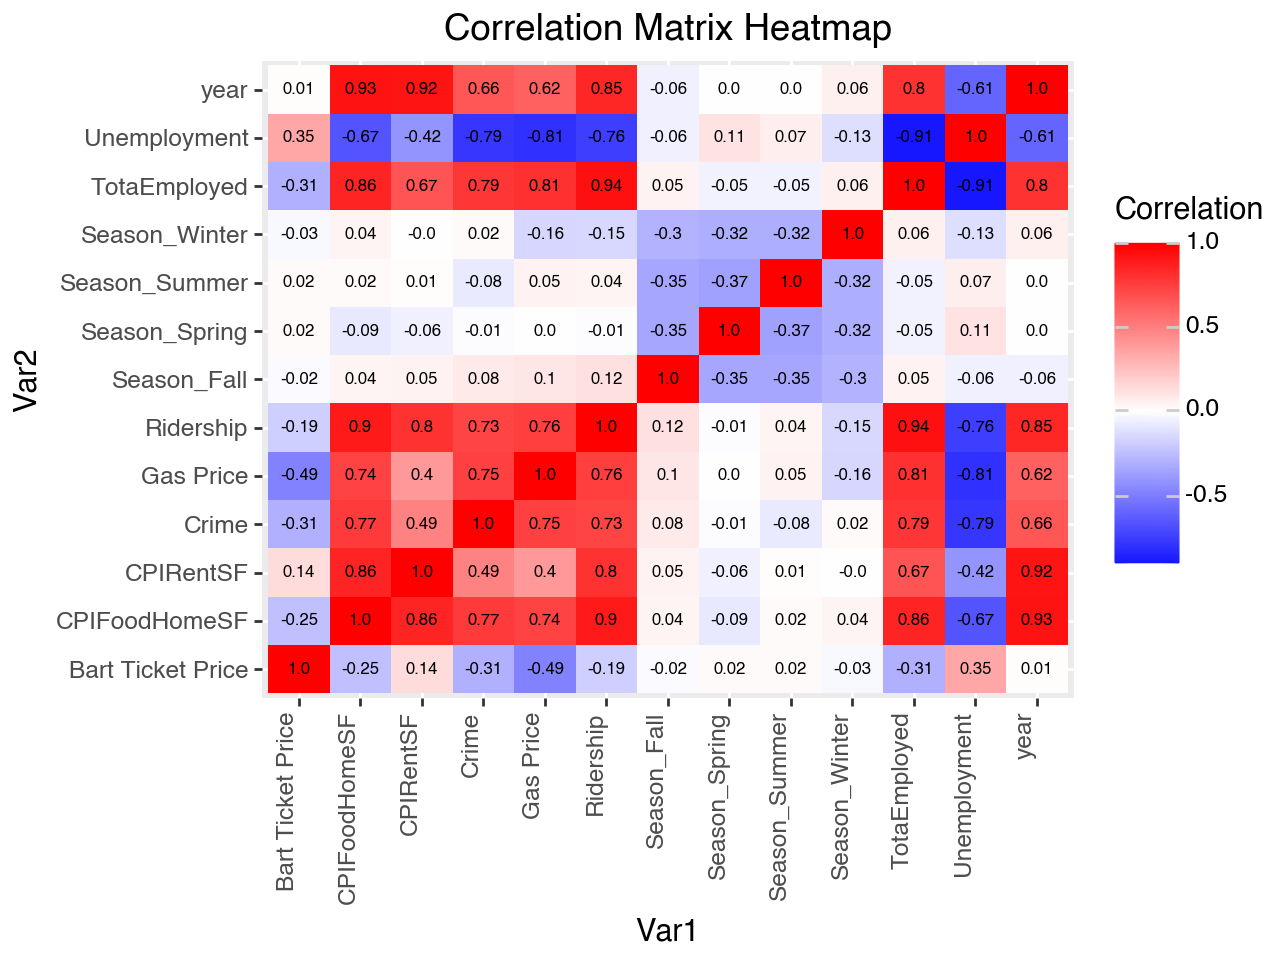

In [13]:
correlation_matrix = bart_corr.corr().reset_index()
# Convert the correlation matrix into long format
corr_long = correlation_matrix.melt(id_vars='index')
corr_long.columns = ['Var1', 'Var2', 'Correlation']
corr_long['Correlation'] = corr_long['Correlation'].round(2)
(p9.ggplot(corr_long) +
p9.aes(x='Var1', y='Var2', fill='Correlation') +
p9.geom_tile() +
p9.geom_text(p9.aes(label='Correlation'), color='black', size=6) +
p9.scale_fill_gradient2(low='blue', high='red', mid='white', midpoint=0) +
p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1),
          axis_text_y=p9.element_text(rotation=0, hjust=1)) +
p9.labs(title='Correlation Matrix Heatmap')
)

In [14]:
X_train = bart.drop(['Ridership','Date','month','season'], axis=1)
y_train = bart['Ridership']
X_train.head()

,TotaEmployed,CPIRentSF,CPIFoodHomeSF,Bart Ticket Price,Gas Price,Unemployment,Crime,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,3647.00,469.88,261.01,4.00,3.20,0.04,56,2020,0,1,0,0
1,3122.70,466.20,269.50,4.00,2.82,0.13,15,2020,0,1,0,0
2,3174.50,464.78,272.48,4.00,2.78,0.13,52,2020,0,1,0,0
3,3228.40,463.70,277.77,4.00,2.96,0.11,47,2020,0,0,1,0
4,3248.30,465.09,272.25,4.00,3.10,0.10,57,2020,0,0,1,0


In [15]:
#y = np.log1p(y)

In [16]:
num = ['TotaEmployed', 'CPIRentSF', 'CPIFoodHomeSF', 'Bart Ticket Price', 'Gas Price', 'Unemployment','Crime']
cat = ['Season_Fall', 'year', 'Season_Spring', 'Season_Summer']

ct_standard = ColumnTransformer(
  [("num", StandardScaler(), num),
   ("cat", "passthrough", cat)
  ],
  remainder = "drop"
).set_output(transform = "pandas")

pipeline_elasticnet = Pipeline(
  [("standardize", ct_standard),
   ("elasticnet_regression", ElasticNet(max_iter = 100000000))]
)

#ct_standard.fit_transform(bart_pre).columns

In [17]:
degree = {'elasticnet_regression__alpha': np.logspace(-3, 1, num=5),
          'elasticnet_regression__l1_ratio': np.linspace(0.1, 1, num=5)}

#gscv_elasticnet = GridSearchCV(pipeline_elasticnet, degree, cv=5, scoring='neg_root_mean_squared_error')

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)
gscv_elasticnet = GridSearchCV(pipeline_elasticnet, degree, cv=tscv, scoring='neg_root_mean_squared_log_error')
gscv_elasticnet_fitted = gscv_elasticnet.fit(X_train, y_train)

In [23]:
mean_test_score = gscv_elasticnet_fitted.cv_results_['mean_test_score']
df = pd.DataFrame(gscv_elasticnet_fitted.cv_results_['params'])
df['RMSE'] = mean_test_score
df = df.sort_values(by='RMSE', ascending=False)
df.head()

,elasticnet_regression__alpha,elasticnet_regression__l1_ratio,RMSE
0,0.00,0.10,-0.12
1,0.00,0.33,-0.12
2,0.00,0.55,-0.12
8,0.01,0.78,-0.12
3,0.00,0.78,-0.12


In [19]:
best_elasticnet = gscv_elasticnet.best_estimator_
y_pred_train = best_elasticnet.predict(X_train)
residuals = y_train - y_pred_train
df_plot1 = pd.DataFrame({'y_pred_train': y_pred_train, 'residuals': residuals})

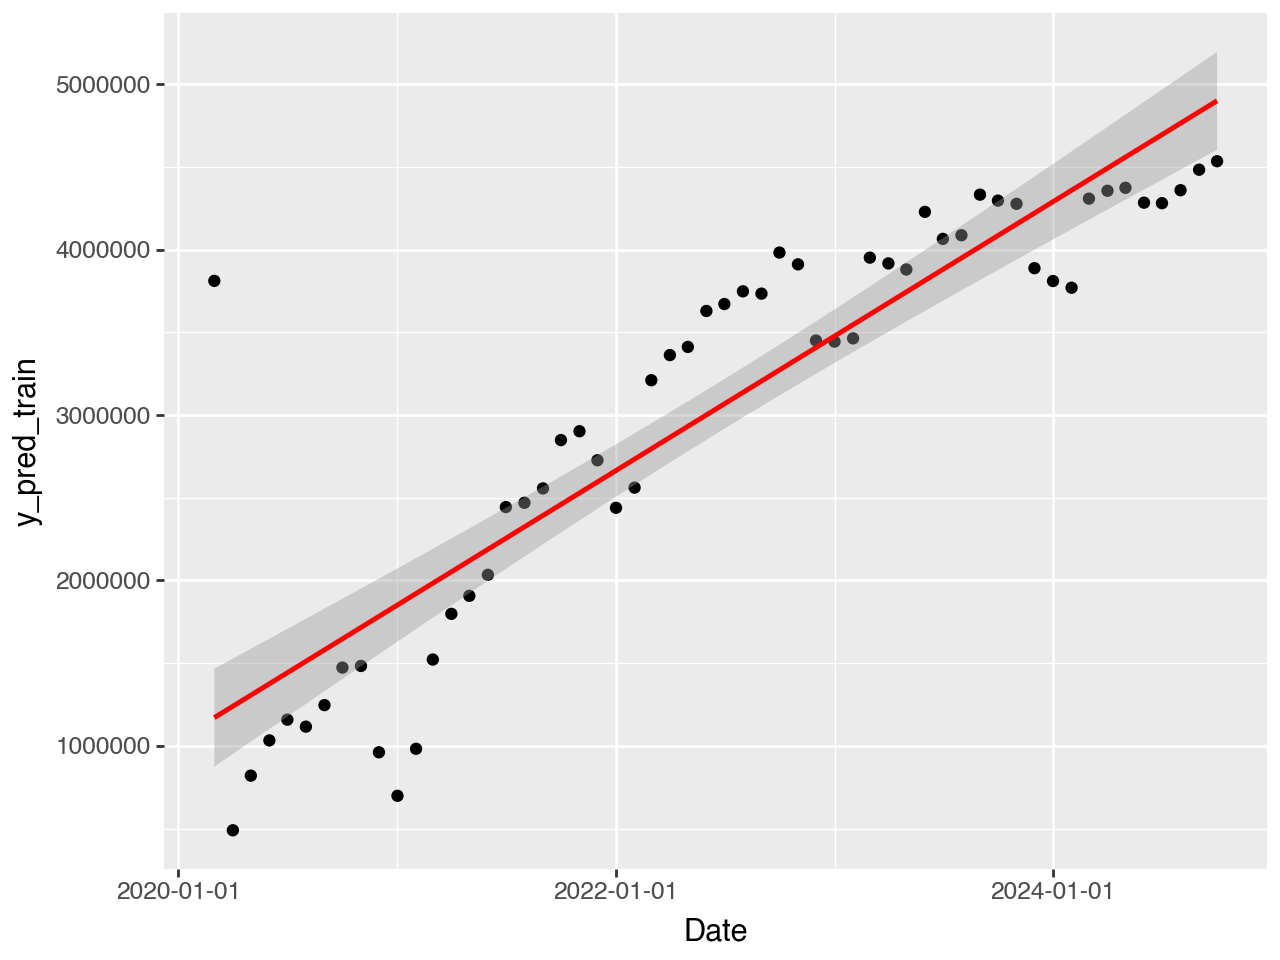

In [20]:
(
p9.ggplot(bart, p9.aes(x='Date', y='y_pred_train'))+
p9.geom_point() +
p9.geom_smooth(method='lm', color = 'red')
)

In [21]:
X_test = bart_post.drop(['Ridership', 'Date','month','Covid', 'season'], axis=1)
y_test = bart_post['Ridership']
X_test.head()

NameError: name 'bart_post' is not defined

- Actually makes sense that post is negative because post has covid

## interaction

In [ ]:
ct_inter = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__AllEmployee", "remainder__Covid"]),
    ("interaction2", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__CPIRentSF", "remainder__Covid"]),
    ("interaction3", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__CPIFoodHomeSF", "remainder__Covid"]),
    ("interaction4", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__Ticket", "remainder__Covid"]),
    ("interaction5", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__Gas", "remainder__Covid"]),
    ("interaction6", PolynomialFeatures(interaction_only=True, include_bias=False), ["standardize__Unemployment", "remainder__Covid"]),
], remainder = "drop").set_output(transform = "pandas")

In [ ]:
ct_inter.fit_transform(ct_standard.fit_transform(bart_pre)).columns

In [ ]:
ct_keep = ColumnTransformer(
    [
      ("keep", FunctionTransformer(), ['interaction1__standardize__AllEmployee',
       'interaction1__remainder__Covid',
       'interaction1__standardize__AllEmployee remainder__Covid',
       'interaction2__standardize__CPIRentSF',
       'interaction2__standardize__CPIRentSF remainder__Covid',
       'interaction3__standardize__CPIFoodHomeSF',
       'interaction3__standardize__CPIFoodHomeSF remainder__Covid',
       'interaction4__standardize__Ticket', 'interaction4__standardize__Ticket remainder__Covid',
       'interaction5__standardize__Gas', 'interaction5__standardize__Gas remainder__Covid',
       'interaction6__standardize__Unemployment', 'interaction6__standardize__Unemployment remainder__Covid'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

In [ ]:
ct_keep.fit_transform(ct_inter.fit_transform(ct_standard.fit_transform(bart_pre))).columns

In [ ]:
pipeline_interaction = Pipeline([
    ("standardize", ct_standard),
    ("interaction", ct_inter),
    ("keep", ct_keep),
    ("elasticnet_regression", ElasticNet(alpha=1, l1_ratio=0.5, max_iter = 10000000))
])

In [ ]:
degree = {'elasticnet_regression__alpha': [0.001, 0.01, 0.1, 1],
          'elasticnet_regression__l1_ratio': [0.1, 0.5, 1]}

#gscv_elasticnet = GridSearchCV(pipeline_elasticnet, degree, cv=5, scoring='r2')

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
gscv_elasticnet = GridSearchCV(pipeline_interaction, degree, cv=tscv, scoring='r2')
gscv_elasticnet_fitted = gscv_elasticnet.fit(X_train, y_train)

In [ ]:
mean_test_score = gscv_elasticnet_fitted.cv_results_['mean_test_score']
df = pd.DataFrame(gscv_elasticnet_fitted.cv_results_['params'])
df['R-squared'] = mean_test_score
df = df.sort_values(by='R-squared', ascending=False)
df.head()

In [ ]:
best_interaction = Pipeline([
    ("standardize", ct_standard),
    ("interaction", ct_inter),
    ("keep", ct_keep),
    ("elasticnet_regression", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 10000000))
])
best_interaction.fit(X_train, y_train)

In [ ]:
y_pred_train = best_interaction.predict(X_train)
y_pred_test = best_interaction.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R^2 on pre-covid data:", r2_train)
print("R^2 on post-covid data:", r2_test)

### kNN

In [ ]:
knn_pipeline = Pipeline([
    ("standardize", ct_standard),
    ("knn", KNeighborsRegressor(n_neighbors=1))
])

In [ ]:
param_grid = {'knn__n_neighbors': range(1, 21)}
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=tscv, scoring='r2')
grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best n_neighbors: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Best R2 score: {grid_search.best_score_:.4f}")

In [ ]:
best_knn = Pipeline([
    ('standardize', ct_standard),
    ('knn', KNeighborsRegressor(n_neighbors=9))
])

best_knn.fit(X_train, y_train)

In [ ]:
knn_y_pred_train = best_knn.predict(X_train)
knn_y_pred_test = best_knn.predict(X_test)

In [ ]:
knn_r2_train = r2_score(y_train, knn_y_pred_train)
knn_r2_test = r2_score(y_test, knn_y_pred_test)

print("knn R^2 on pre-covid data:", knn_r2_train)
print("knn R^2 on post-covid data:", knn_r2_test)

## post covid, no tuning!! just fit!

In [ ]:
bart_post = pd.read_csv("bart_post.csv")
bart_post.head()

In [25]:
bart_post = pd.read_csv("https://www.dropbox.com/scl/fi/fhudhxpxqtkg534m55c55/bart_post.csv?rlkey=pcjdnm3k1xeot84ogrmcjkwwr&st=adcotvzr&dl=1")
bart_post.head()

,Ridership,Date,TotaEmployed,CPIRentSF,CPIFoodHomeSF,Bart Ticket Price,Gas Price,Unemployment,Crime
0,4089796,2020/03,3647.00,469.88,261.01,4.00,3.20,0.04,56
1,631371,2020/04,3122.70,466.20,269.50,4.00,2.82,0.13,15
2,736590,2020/05,3174.50,464.78,272.48,4.00,2.78,0.13,52
3,1049729,2020/06,3228.40,463.70,277.77,4.00,2.96,0.11,47
4,1193988,2020/07,3248.30,465.09,272.25,4.00,3.10,0.10,57


In [52]:
bart_post['Ridership'].describe()

count        56.00
mean    3035578.89
std     1251008.57
min      631371.00
25%     1924797.00
50%     3449446.00
75%     4072795.00
max     4831431.00
Name: Ridership, dtype: float64

In [53]:
bart_post['Ridership'].var()

1565022451793.0427

In [26]:
X_post = bart_post.drop(['Ridership', 'Date'], axis=1)
y_post = bart_post['Ridership']

In [27]:
X_post.head()

,TotaEmployed,CPIRentSF,CPIFoodHomeSF,Bart Ticket Price,Gas Price,Unemployment,Crime
0,3647.00,469.88,261.01,4.00,3.20,0.04,56
1,3122.70,466.20,269.50,4.00,2.82,0.13,15
2,3174.50,464.78,272.48,4.00,2.78,0.13,52
3,3228.40,463.70,277.77,4.00,2.96,0.11,47
4,3248.30,465.09,272.25,4.00,3.10,0.10,57


In [28]:
ct_standard = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct_standard.fit_transform(X_post).columns

Index(['standardize__TotaEmployed', 'standardize__CPIRentSF',
       'standardize__CPIFoodHomeSF', 'standardize__Bart Ticket Price',
       'standardize__Gas Price', 'standardize__Unemployment',
       'standardize__Crime'],
      dtype='object')

In [29]:
pipeline_elasticnet = Pipeline(
  [("standardize", ct_standard),
   ("elasticnet_regression", ElasticNet())]
)
pipeline_elasticnet.fit(X_post, y_post)

Pipeline(steps=[('standardize',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1767d3770>)])),
                ('elasticnet_regression', ElasticNet())])

In [30]:
en_r2_score = pipeline_elasticnet.score(X_post, y_post)
print(f"R2 Score for ElasticNet model: {en_r2_score:.4f}")

R2 Score for ElasticNet model: 0.9012


In [48]:
# Make predictions
y_pred = pipeline_elasticnet.predict(X_post)

# Compute MSE
rmse = root_mean_squared_error(y_post, y_pred)

print(f"elastic net Mean Squared Error: {rmse}")

elastic net Mean Squared Error: 389774.3939841862


In [32]:
# Access the ElasticNet model from the pipeline
elasticnet_model = pipeline_elasticnet.named_steps['elasticnet_regression']

# Get the coefficients and feature names
coefficients = elasticnet_model.coef_
feature_names = X_post.columns

# Display the coefficients alongside feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

             Feature  Coefficient
0       TotaEmployed    309758.58
1          CPIRentSF    290250.42
2      CPIFoodHomeSF    212931.96
3  Bart Ticket Price     21286.75
4          Gas Price    171024.57
5       Unemployment   -133878.20
6              Crime     85072.99


# Linear Regression

In [33]:
lr_pipeline = Pipeline(
  [("standardize", ct_standard),
   ("linear", LinearRegression())]
)
lr_pipeline.fit(X_post, y_post)

Pipeline(steps=[('standardize',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1767d3770>)])),
                ('linear', LinearRegression())])

In [34]:
lr_r2_score = lr_pipeline.score(X_post, y_post)
print(f"R2 Score for linear regression model: {lr_r2_score:.4f}")

R2 Score for linear regression model: 0.9647


In [35]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = lr_pipeline.predict(X_post)

# Compute MSE
mse = mean_squared_error(y_post, y_pred)

print(f"linear regression Mean Squared Error: {mse}")

linear regression Mean Squared Error: 54274699440.34037


In [36]:
# Access the ElasticNet model from the pipeline
lr_model = lr_pipeline.named_steps['linear']

# Get the coefficients and feature names
lr_coefficients = lr_model.coef_
lr_feature_names = X_post.columns

# Display the coefficients alongside feature names
coef_df = pd.DataFrame({'Feature': lr_feature_names, 'Coefficient': lr_coefficients})
print(coef_df)

             Feature  Coefficient
0       TotaEmployed   1374857.30
1          CPIRentSF    630684.59
2      CPIFoodHomeSF   -606380.39
3  Bart Ticket Price    -28094.93
4          Gas Price    372945.67
5       Unemployment    605853.17
6              Crime    162340.23


# kNN

In [37]:
pipeline_knn = Pipeline(
  [("standardize", ct_standard),
   ('knn', KNeighborsRegressor())]
)
pipeline_knn.fit(X_post, y_post)

Pipeline(steps=[('standardize',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1767d3770>)])),
                ('knn', KNeighborsRegressor())])

In [38]:
knn_r2_score = pipeline_knn.score(X_post, y_post)
print(f"R2 Score for knnt model: {knn_r2_score:.4f}")

R2 Score for knnt model: 0.9105


In [55]:
y_pred_knn = pipeline_knn.predict(X_post)

# Compute MSE
rmse_knn = root_mean_squared_error(y_post, y_pred_knn)

print(f"Mean Squared Error for kNN: {rmse_knn}")

Mean Squared Error for kNN: 370839.5197693192


Visualizations

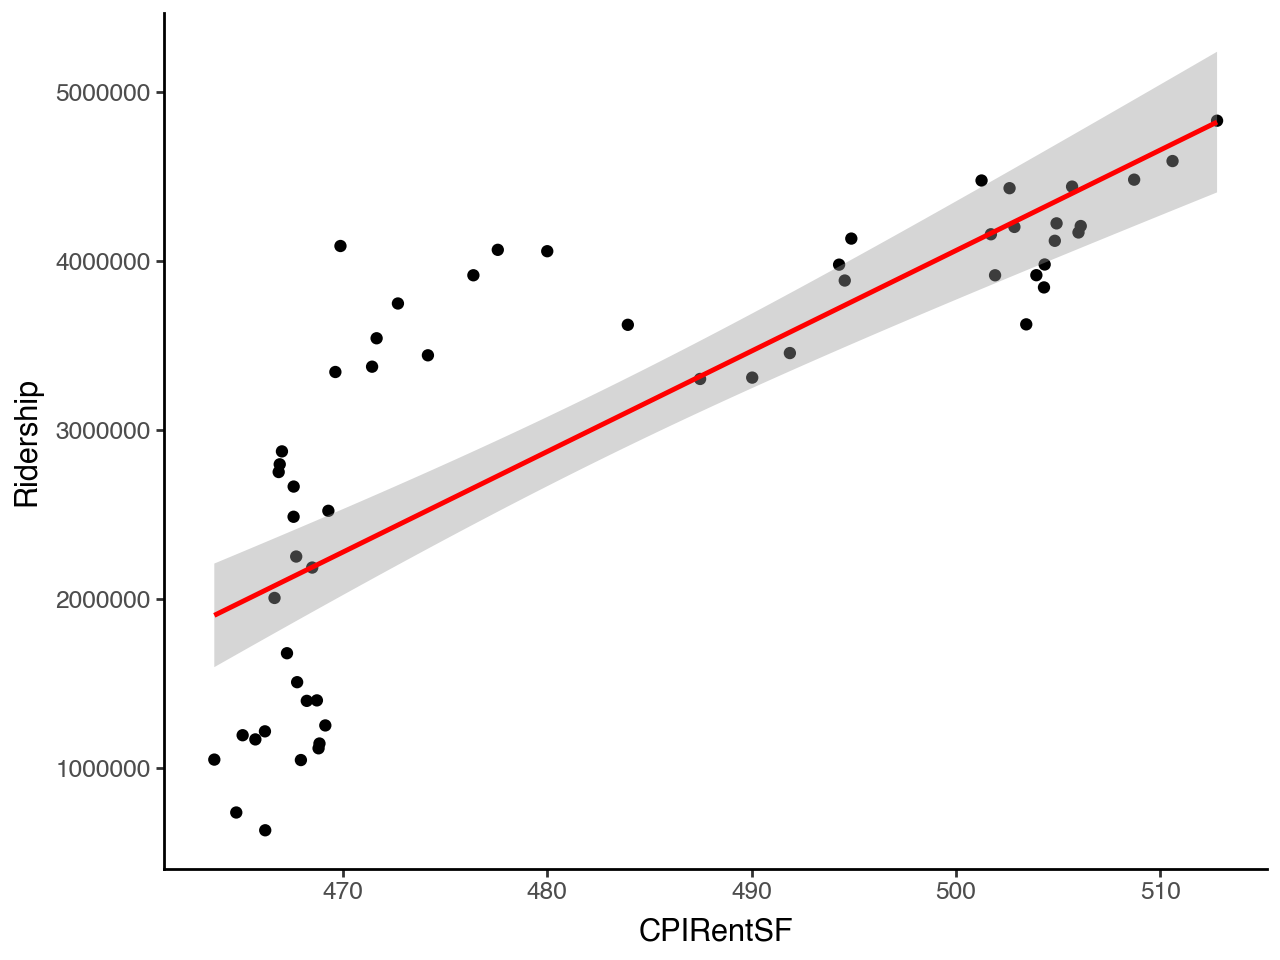

In [40]:
#Plot a line plot with x axis being CPIRentSF and the y axis being Ridership, line red
from plotnine import *

(ggplot(bart_post)
 + aes(x='CPIRentSF', y='Ridership')+
 geom_point() +
 geom_smooth(method = 'lm', color='red')  # Specify color directly in geom_line
 + theme_classic()
)

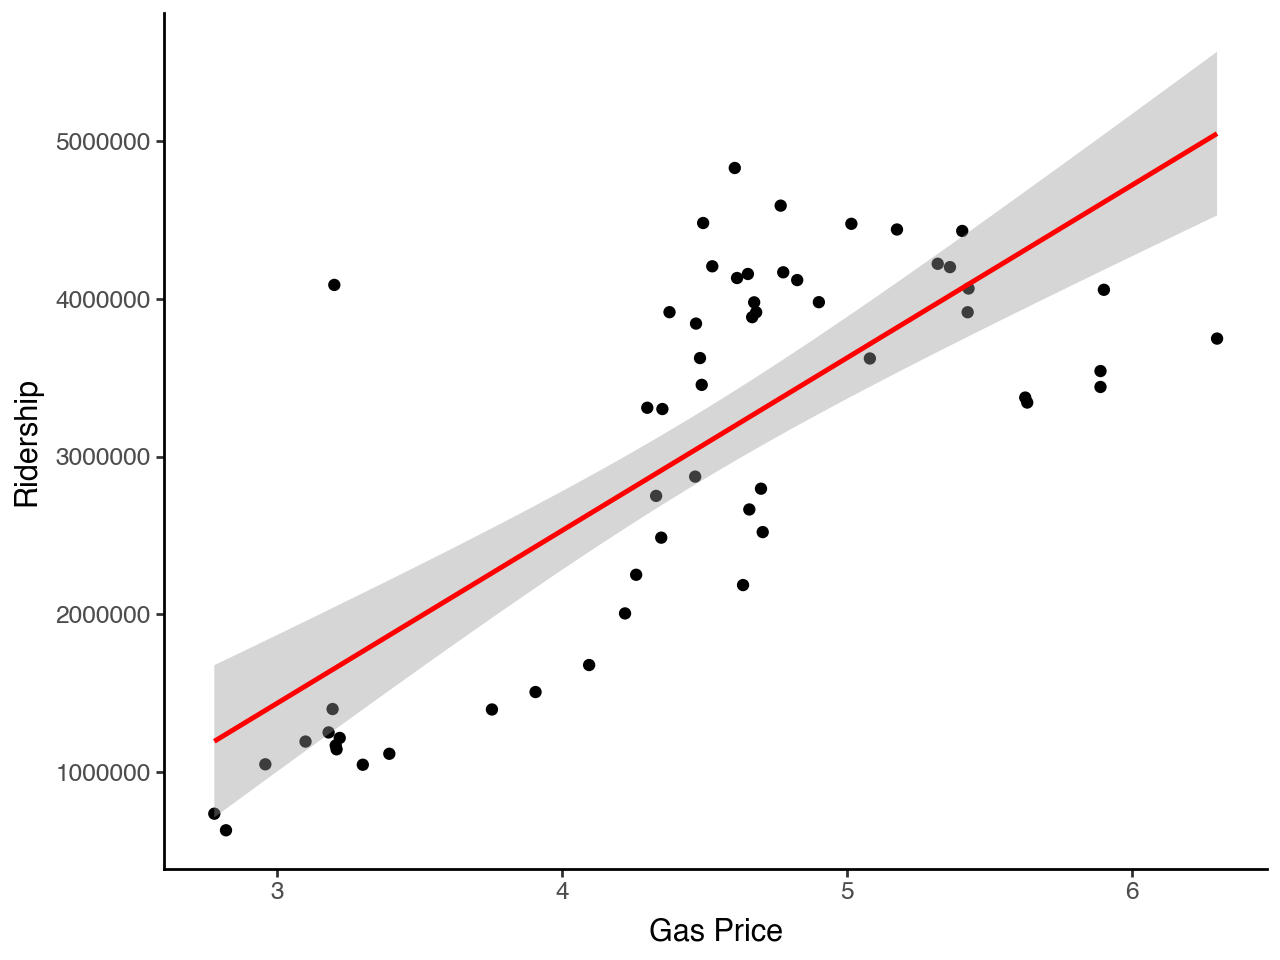

In [42]:
#Plot a line plot with x axis being Gas and the y axis being Ridership
(ggplot(bart_post)
 + aes(x='Gas Price', y='Ridership') +
 geom_point() +
 geom_smooth(method = 'lm', color='red')   # Specify color directly in geom_line
 + theme_classic()
)

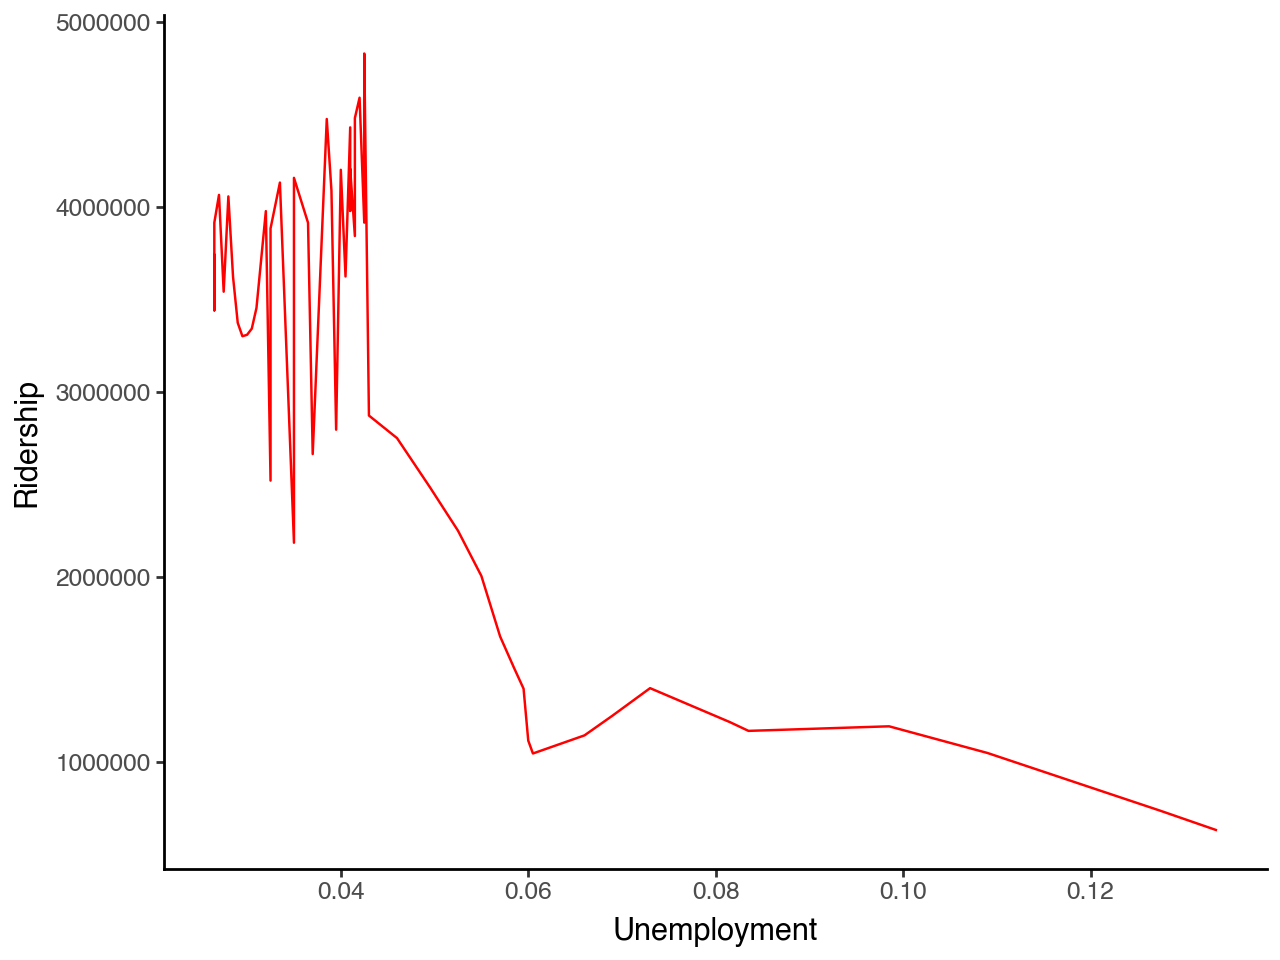

In [43]:
(ggplot(bart_post)
 + aes(x='Unemployment', y='Ridership')
 + geom_line(color='red')  # Specify color directly in geom_line
 + theme_classic()
)

In [44]:
(ggplot(bart_post)
 + aes(x='AllEmployee', y='Ridership')+
 geom_point() +
 geom_smooth(method = 'lm', color='red') +  # Specify color directly in geom_line
 theme_classic()
)

PlotnineError: "Could not evaluate the 'x' mapping: 'AllEmployee' (original error: name 'AllEmployee' is not defined)"

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


PlotnineError: "Could not evaluate the 'x' mapping: 'AllEmployee' (original error: name 'AllEmployee' is not defined)"

In [ ]:
(ggplot(bart_post)
 + aes(x='CPIFoodHomeSF', y='Ridership')
 + geom_line(color='red')  # Specify color directly in geom_line
 + theme_classic()
)